# Theory of Weighted Average Calculations

In this laboratory course, there are a lot of calculations of the uncertainty in a derived quantity, based on the uncertainties in the raw quantities involved.  We can understand how to calculate these uncertainties using just a little bit of calculus!

Consider a function, $z = f(x,y)$.  We imagine that $x$ and $y$ are two independent raw quantities measured in the experiment, and $z$ is some derived quantity.  The appropriate way to calculate the uncertainy in a derived quantity will depend, fundamentally, on the $type$ of uncertainty:  instrumental (uniform), or counting experiment (Gaussian), for example.  

The chain-rule of differentiation, together with an assumption that the uncertainties are $uniform$ in nature (such as, for example, one typically has in the experiments in this lab course), lead to the following:

\begin{equation}
\delta z = \left| \frac{\partial{f}}{\partial{x}} \right| \delta x + 
 \left| \frac{\partial{f}}{\partial{y}} \right| \delta y
\tag{2}
\end{equation}

Now, consider the function $z = \frac{x}{y}$.  This particular relationship will be very useful in this experiment!  

The calculation of density in Equation ([1](#mjx-eqn)) will require a determination of the mass and volume of each rod. The
final density will be an average of the computations for each method of measuring the volume of the cylinder. We
will need the uncertainty in the computed density. Using Equation ([2](#mjx-eqn)), we can show that:

\begin{equation}
\frac{\delta \rho}{\rho} = \frac{\delta m}{m} + \frac{\delta V}{V}
\tag{3}
\end{equation}

A second extremely important concept in this experiment is the calculation of the weighted average of a series of numbers, each of which has an uncertainty associated with it.  For example, imagine that we make four measurements of the same quantity, $x$, and have an uncertainty, $\delta x$, for each of these four measurements.  The questions are:

(a) What is the $average$ of these four measurements?  
(b) What is the $uncertainty$ in this average?

Normally, when we average a series of numbers, we simply add up the values and divide by the total number of values:

\begin{equation}
\bar{x} = \frac{1}{N} \sum_{i=1}^N x_i
\end{equation}

However, when each of the measurements has an uncertainty, it is not so simple.  The idea is that we want to attach more importance to measurements with $small$ uncertainties, and less importance to measurements with $large$ uncertainties.  This is called calculating a $weighted$ average.  For Gaussian uncertainties, it turns out that the way that we do this is to calculate the average as:

\begin{equation}
\bar{x} = \frac{\sum_{i=1}^N w_i x_i} {\sum_{i=1}^N w_i}
\end{equation}

where the $w_i$ are weights associated with each measurement.  For the case of uniform uncertainties, we have that $w_i = \frac{1}{\delta x_i}$.  For Gaussian uncertainties, we use $w_i = \frac{1}{\delta x_i^2}$.

Note that if $\delta x_i$ is small, the corresponding weight in the sum will be large, which is exactly what we want!

For the calculation of the uncertainty in $\bar{x}$, there are $TWO$ separate concepts related to uncertainties that we must consider.  The first is that there are uncertainties in each of the raw quantities that are being used to calculate the weighted mean.  So, there is going to be some uncertainty that propogates through to the uncertainty in the weighted mean because of this.  The second source of uncertainty comes from the notion that the actual $values$ of the individual measurements are not all the same.  There must then be some uncertainty in the weighted average from this source of fluctuation.  The mathematics of calculating each of these uncertainties and how they contribute to the final uncertainty is actually quite complex and involved.  For the purposes of this course, we are going to simply report the final result of this mathematical exercise:

\begin{equation}
\delta \bar{x} = \sqrt{ \left( \frac{\sum_{i=1}^N w_i x_i^2}{\sum_{i=1}^N w_i} - (\bar{x})^2 \right)   \frac{\sum_{i=1}^N w_i^2}{(\sum_{i=1}^N w_i)^2 - \sum_{i=1}^N w_i^2} }
\end{equation}

Example:  Consider the following measurements of the quantity, $x$

\begin{equation}
x_1 = 100.0 \pm 0.1 \\
x_2 = 102.0 \pm 0.2 \\
x_3 = 98.0 \pm 0.02 \\ \nonumber
\end{equation}

\begin{equation}
\sum_{i=1}^N \frac{x_i}{\delta x_i} = \frac{100}{0.1} + \frac{102}{0.2} + \frac{98}{0.02} = 6410.0 \nonumber
\end{equation}

\begin{equation}
\sum_{i=1}^N \frac{1}{\delta x_i} = \frac{1}{0.1} + \frac{1}{0.2} + \frac{1}{0.02} = 65.0 \nonumber
\end{equation}

\begin{equation}
\bar{x} = \frac{6410.0}{65.0} = 98.6154 \nonumber
\end{equation}

Notice the $weighted$ average is closer to 98 than to either of the other two data values, because the uncertainty in that measured value is significantly smaller than the other uncertainties.

\begin{equation}
\sum_{i=1}^N w_i = \frac{1}{0.1} + \frac{1}{0.2} + \frac{1}{0.02} = 65.0 \nonumber  \nonumber
\end{equation}

\begin{equation}
\sum_{i=1}^N w_i^2 = \frac{1}{0.1^2} + \frac{1}{0.2^2} + \frac{1}{0.02^2} = 2625.0 \nonumber
\end{equation}

\begin{equation}
\sum_{i=1}^N w_i x_i^2 = \frac{100^2}{0.1} + \frac{102^2}{0.2} + \frac{98^2}{0.02} = 632220.0 \nonumber
\end{equation}

\begin{equation}
\delta \bar{x} = \sqrt{ \left( \frac{632220}{65} - (98.6154)^2 \right)   \frac{2625}{(65)^2 - 2625} } = 1.55 \nonumber
\end{equation}

Thus, we would quote the weighted average as $\bar{x} = 98.6 \pm 1.6$.

Let's write a python function to do all of this!  It will take the $x$ and $\delta x$ measurements as numpy array inputs, together with the $type$ of uncertainty (i.e. uniform=1 or Gaussian=2), and will return $\bar{x}$ and $\delta \bar{x}$.  We can use this throughout the course to calculate weighted averages and uncertainties!!!!!!

In [1]:
# Import Numpy, Pandas, and MatPlotLib with standard names
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def weighted_average_local(x,deltax,etype):
    
    if (etype == 1):
        w = 1/deltax
    else:
        w = 1/deltax**2
    
    # calculate the statistically weighted average of density
    sq_sum1 = 0.0
    sq_sum2 = 0.0
    sq_sum3 = 0.0
    sq_sum4 = 0.0
    sq_sum5 = 0.0
    
    for i in range(len(x)):
        sq_sum1 = sq_sum1 + w[i]*x[i]
        sq_sum2 = sq_sum2 + w[i]
        sq_sum3 = sq_sum3 + w[i]*x[i]**2
        sq_sum4 = sq_sum4 + w[i]
        sq_sum5 = sq_sum5 + w[i]**2
                   
    xbar = sq_sum1/sq_sum2
    delta_xbar = np.sqrt((np.abs(sq_sum3/sq_sum2 - xbar**2))*
                             sq_sum5/(sq_sum4**2-sq_sum5))
    
    neff = sq_sum4**2/sq_sum5
    print("Effective N_dof = ",neff)
    
    factor = np.sqrt((neff-1.0)/(len(x)-1))
    print("Correction factor = ",factor)
    
    return xbar,delta_xbar,neff,factor

In [2]:
x = np.array([100.0,102.0,98.0])
deltax = np.array([0.1,0.2,0.02])

xbar,delta_xbar,neff,factor = weighted_average_local(x,deltax,1)

print ("")
print ("Average Density (Uniform) = %0.4f +/- %0.4f g/cm^3" % 
       (xbar,delta_xbar))
print("")

xbar,delta_xbar,neff,factor = weighted_average_local(x,deltax,2)

print ("")
print ("Average Density (Gaussian) = %0.4f +/- %0.4f g/cm^3" % 
       (xbar,delta_xbar))

Effective N_dof =  1.6095238095238096
Correction factor =  0.5520524474738834

Average Density (Uniform) = 98.6154 +/- 1.5516 g/cm^3

Effective N_dof =  1.10062893081761
Correction factor =  0.22430886163681768

Average Density (Gaussian) = 98.1143 +/- 1.7026 g/cm^3


Constant Fit: Coefficients (from curve_fit)
[98.11428571]
Constant Fit: Covariance Matrix (from curve_fit)
[[0.14585034]]

Constant Fit: Final Result: y = (98.11429 +/- 0.38190)



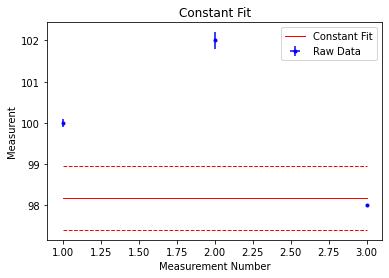

Conclusion:  the value for the uncertainty that we get from the curve_fit() function is incorrect!

Using the correction factor that was printed out above, for Gaussian errors, we see that:

1.7026 * 0.2243 = 0.3819


In [3]:
# Let's look at doing a constant fit
# to these three data points using Python's stats curve_fit function)

import sys; sys.path.insert(0, '..')
from P201_Functions import *

x_data = [1,2,3]
y_data = x
Delta_x = [0.001,0.001,0.001]
Delta_y = deltax

# Creates the base plot with titles
plt.errorbar(x_data,y_data,Delta_y,Delta_x,'b.',label='Raw Data')
plt.ylabel('Measurent')
plt.xlabel('Measurement Number')
plt.title('Constant Fit')

# Takes the x and y values to make a trendline
intercept,dintercept = constant_fit_plot_errors(x_data,y_data,Delta_y,plt)

# Adds the legend to the plot
plt.legend()

# Displays the plot
plt.show()

print("Conclusion:  the value for the uncertainty that we get from the curve_fit() function is incorrect!")
print("")
print("Using the correction factor that was printed out above, for Gaussian errors, we see that:")
print("")
print("%0.4f * %0.4f = %0.4f" % (delta_xbar,factor,delta_xbar*factor))

Effective N_dof =  3.0
Correction factor =  1.0

Average Density (Uniform) = 100.0000 +/- 0.5774 g/cm^3

Effective N_dof =  3.0
Correction factor =  1.0

Average Density (Gaussian) = 100.0000 +/- 0.5774 g/cm^3
Constant Fit: Coefficients (from curve_fit)
[100.]
Constant Fit: Covariance Matrix (from curve_fit)
[[0.33333333]]

Constant Fit: Final Result: y = (100.00000 +/- 0.57735)



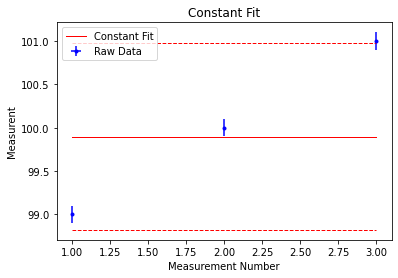

Conclusion:  the value for the uncertainty that we get from the curve_fit() function is incorrect!

Using the correction factor that was printed out above, for Gaussian errors, we see that:

0.5774 * 1.0000 = 0.5774


In [6]:
x = np.array([99.0,100.0,101.0])
deltax = np.array([0.1,0.1,0.1])

xbar,delta_xbar,neff,factor = weighted_average_full(x,deltax,1)

print ("")
print ("Average Density (Uniform) = %0.4f +/- %0.4f g/cm^3" % 
       (xbar,delta_xbar))
print("")

xbar,delta_xbar,neff,factor = weighted_average_full(x,deltax,2)

print ("")
print ("Average Density (Gaussian) = %0.4f +/- %0.4f g/cm^3" % 
       (xbar,delta_xbar))

x_data = [1,2,3]
y_data = x
Delta_x = [0.001,0.001,0.001]
Delta_y = deltax

# Creates the base plot with titles
plt.errorbar(x_data,y_data,Delta_y,Delta_x,'b.',label='Raw Data')
plt.ylabel('Measurent')
plt.xlabel('Measurement Number')
plt.title('Constant Fit')

# Takes the x and y values to make a trendline
intercept,dintercept = constant_fit_plot_errors(x_data,y_data,Delta_y,plt)

# Adds the legend to the plot
plt.legend()

# Displays the plot
plt.show()

print("Conclusion:  the value for the uncertainty that we get from the curve_fit() function is incorrect!")
print("")
print("Using the correction factor that was printed out above, for Gaussian errors, we see that:")
print("")
print("%0.4f * %0.4f = %0.4f" % (delta_xbar,factor,delta_xbar*factor))

